In [1]:
import pandas as pd

training_data = pd.read_csv("/users/apple/Downloads/project1/training_set.csv")
pred_data = pd.read_csv("/Users/apple/Downloads/project1/testing_set.csv")

In [2]:
training_data.head(10)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,NaN,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,NaN,No,4006.0,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841.0,10968.0,349.0,360.0,1.0,Semiurban,N


Missing data treatment¶

In [3]:
training_data.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
pred_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [5]:
training_data.Gender.value_counts().index[0]

'Male'

In [6]:
def catconsep(df):
    cat = []
    con = []
    for i in df.columns:
        if(df[i].dtypes=="object"):
            cat.append(i)
        else:
            con.append(i)
    return cat,con

In [7]:
cat,con = catconsep(training_data)

In [8]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [9]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [11]:
for i in cat:
    training_data[i] = training_data[i].fillna(training_data[i].value_counts().index[0])



In [12]:
training_data[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Loan_ID        614 non-null    object
 1   Gender         614 non-null    object
 2   Married        614 non-null    object
 3   Dependents     614 non-null    object
 4   Education      614 non-null    object
 5   Self_Employed  614 non-null    object
 6   Property_Area  614 non-null    object
 7   Loan_Status    614 non-null    object
dtypes: object(8)
memory usage: 38.5+ KB


In [13]:
cat,con = catconsep(pred_data)
for i in cat:
    pred_data[i] = pred_data[i].fillna(pred_data[i].value_counts().index[0])

In [14]:
cat,con = catconsep(pred_data)
for i in cat:
    pred_data[i] = pred_data[i].fillna(pred_data[i].value_counts().index[0])

for i in con:
    training_data[i] = training_data[i].fillna(training_data[i].mean())

In [15]:
for i in con:
    pred_data[i] = pred_data[i].fillna(pred_data[i].mean())

In [16]:
training_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
pred_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# EDA

In [18]:
import matplotlib.pyplot as plt
import seaborn as sb

In [19]:
training_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

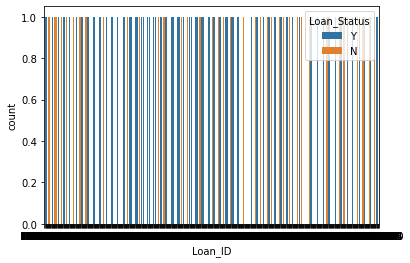

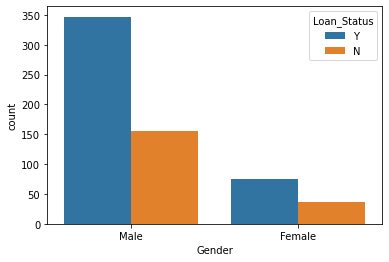

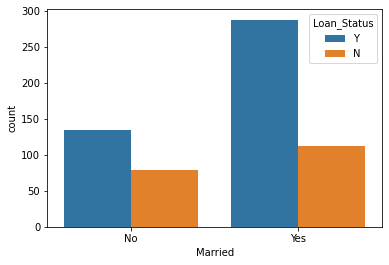

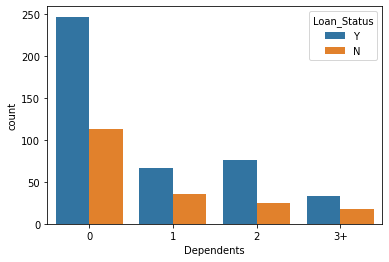

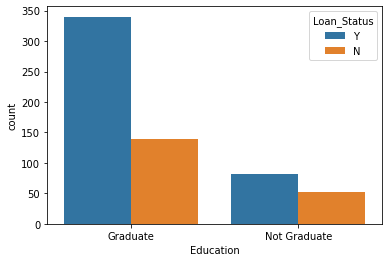

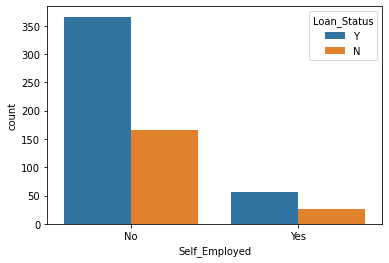

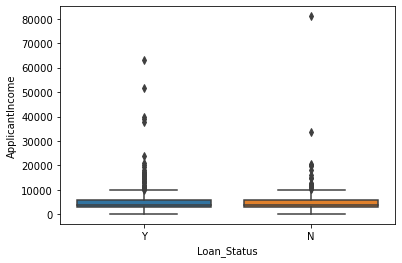

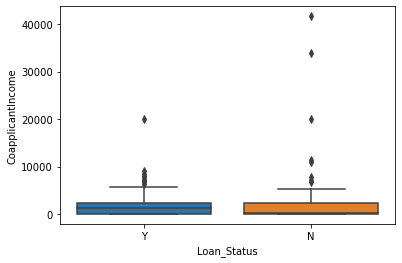

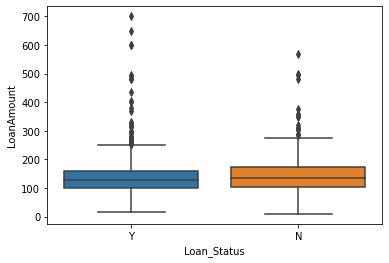

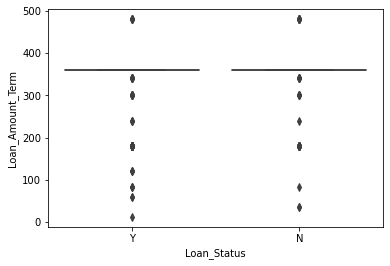

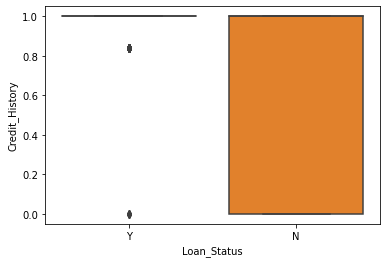

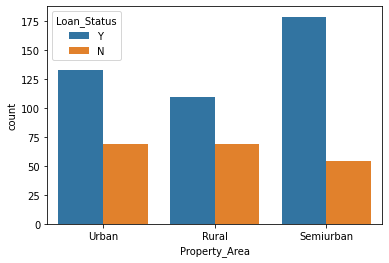

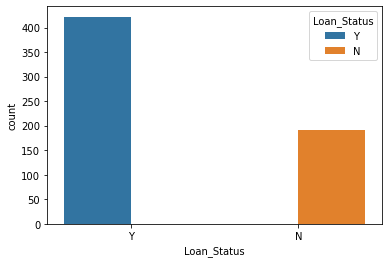

In [20]:
for i in training_data.columns:
    if(training_data[i].dtypes=="object"):
        sb.countplot(training_data[i],hue=training_data.Loan_Status)
        plt.show()
    else:
        sb.boxplot(training_data.Loan_Status,training_data[i])
        plt.show()


In [21]:
training_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417.00000,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333.00000,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036.00000,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006.00000,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841.00000,10968.0,349.000000,360.0,1.0,Semiurban,N


# Preprocessing

In [23]:
cat,con = catconsep(training_data)
cat.remove("Loan_Status")
cat.remove("Loan_ID")
trd_con = training_data[con]
trd_con = trd_con.join(pd.get_dummies(training_data[cat]))



In [24]:
trd_con.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.00000,0.0,146.412162,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,5405.54085,1508.0,128.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000.00000,0.0,66.000000,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583.00000,2358.0,120.000000,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000.00000,0.0,141.000000,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
5,5417.00000,4196.0,267.000000,360.0,1.0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1
6,2333.00000,1516.0,95.000000,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
7,3036.00000,2504.0,158.000000,360.0,0.0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0
8,4006.00000,1526.0,168.000000,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
9,12841.00000,10968.0,349.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0


In [25]:
cat,con = catconsep(pred_data)
#cat.remove("Loan_Status")
cat.remove("Loan_ID")
tsd_con = pred_data[con]
tsd_con = tsd_con.join(pd.get_dummies(pred_data[cat]))

In [26]:
tsd_con

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.000000,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.000000,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,0.825444,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.000000,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.000000,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,4158,709,115.0,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,3250,1993,126.0,360.0,0.825444,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,5000,2393,158.0,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


In [27]:
xtrain = trd_con
ytrain = training_data[["Loan_Status"]]

In [28]:
xtest = tsd_con

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [30]:
pred = model.predict(xtest)

In [31]:
pred_data['Predicted_loan_status']=pred

In [32]:
pred_data[["Loan_ID","Predicted_loan_status"]]

,Loan_ID,Predicted_loan_status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [33]:
xtrain.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.00000,0.0,146.412162,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,5405.54085,1508.0,128.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000.00000,0.0,66.000000,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1


In [34]:
A = xtrain.join(ytrain)

In [35]:
X = A[xtrain.drop(labels=["Gender_Female","Gender_Male"],axis=1).columns]
Y = A["Loan_Status"]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=22)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.8292682926829268

In [36]:
training_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,Y


In [37]:
pred_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predicted_loan_status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,Y


In [38]:
rejected_loans = pred_data[pred_data.Predicted_loan_status=="N"]

In [39]:
trd_con.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.00000,0.0,146.412162,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,5405.54085,1508.0,128.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0


In [41]:
training_data = pd.read_csv("/users/apple/Downloads/project1/training_set.csv")
training_data = training_data[training_data.Loan_Status=="Y"]

In [42]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 0 to 612
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            422 non-null    object 
 1   Gender             412 non-null    object 
 2   Married            419 non-null    object 
 3   Dependents         413 non-null    object 
 4   Education          421 non-null    object 
 5   Self_Employed      399 non-null    object 
 6   ApplicantIncome    421 non-null    float64
 7   CoapplicantIncome  421 non-null    float64
 8   LoanAmount         411 non-null    float64
 9   Loan_Amount_Term   414 non-null    float64
 10  Credit_History     385 non-null    float64
 11  Property_Area      422 non-null    object 
 12  Loan_Status        422 non-null    object 
dtypes: float64(5), object(8)
memory usage: 46.2+ KB


In [43]:
cat = []
con = []
for i in training_data.columns:
    if(training_data[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)
for i in cat:
    training_data[i] = training_data[i].fillna(training_data[i].value_counts().index[0])

for i in con:
    training_data[i] = training_data[i].fillna(training_data[i].mean())
    
trd_con = training_data[con]
cat.remove("Loan_ID")
trd_cat = pd.get_dummies(training_data[cat])
trd = trd_con.join(trd_cat)

In [44]:
trd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 0 to 612
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          422 non-null    float64
 1   CoapplicantIncome        422 non-null    float64
 2   LoanAmount               422 non-null    float64
 3   Loan_Amount_Term         422 non-null    float64
 4   Credit_History           422 non-null    float64
 5   Gender_Female            422 non-null    uint8  
 6   Gender_Male              422 non-null    uint8  
 7   Married_No               422 non-null    uint8  
 8   Married_Yes              422 non-null    uint8  
 9   Dependents_0             422 non-null    uint8  
 10  Dependents_1             422 non-null    uint8  
 11  Dependents_2             422 non-null    uint8  
 12  Dependents_3+            422 non-null    uint8  
 13  Education_Graduate       422 non-null    uint8  
 14  Education_Not Graduate   4

In [45]:
xtrain = trd.drop(labels=["LoanAmount","Loan_Status_Y"],axis=1)
ytrain = trd[["LoanAmount"]]

In [46]:
pred_data = pd.read_csv("/users/apple/Downloads/project1/testing_set.csv")

In [47]:
#tsd = pred_data[pred=="N"]

In [48]:
cat = []
con = []
for i in pred_data.columns:
    if(pred_data[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)
for i in cat:
    pred_data[i] = pred_data[i].fillna(pred_data[i].value_counts().index[0])

for i in con:
    pred_data[i] = pred_data[i].fillna(pred_data[i].mean())
    
cat.remove("Loan_ID")
pred_data_cat = pd.get_dummies(pred_data[cat])
pred_data = pred_data[con].join(pred_data_cat)

In [49]:
pred_data.shape

(367, 20)

In [51]:
xtest = pred_data[pred=="N"]

ValueError: Item wrong length 123 instead of 367.

In [52]:
xtest = xtest.drop(labels=["LoanAmount"],axis=1)

In [53]:
ytest = pred_data[['LoanAmount']][pred=="N"]

ValueError: Item wrong length 123 instead of 367.

In [54]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
model = dtr.fit(xtrain,ytrain)
pred = model.predict(xtest)

ValueError: Number of features of the model must match the input. Model n_features is 19 and input n_features is 17 

In [ ]:
ytest['predicted_duration']=pred_duration

In [ ]:
a = ytest["Loan_Amount_Term"]/12
b = ytest["predicted_duration"]/12

In [ ]:
Q = pd.DataFrame([a,b]).T

In [ ]:
Q.columns = ["Loan_Amount_Term","predicted_duration"]

In [ ]:
Q

# 2.)Identify customer segments from given data and categorize customer into one of the segments.

In [ ]:
training_data

In [ ]:
B = training_data[["LoanAmount"]]

In [ ]:
B["Income"] = training_data.ApplicantIncome+training_data.CoapplicantIncome

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
model =km.fit(B)

In [ ]:
model.labels_

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(B['LoanAmount'],B.Income,c=model.labels_)